In our career as a data analyst or scientist, we'll use data visualization techniques frequently to familiarize ourself with new data sets, come up with questions to ask, and plan analyses.

In this project, our task is to use these techniques, as well as data analysis skills, to explore data on forest fires.

To get started, import the data set, `"forestfires.csv"`, into R as a data frame. We can download it [here](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/).

Forest fires can create ecological problems and endanger human lives and property. Understanding when they occur and what causes them is important for managing them. The data we'll be working with in this project is associated with a [scientific research paper](http://www3.dsi.uminho.pt/pcortez/fires.pdf) on predicting the occurrence of forest fires in Portugal using modeling techniques.

In [1]:
from IPython.display import Image

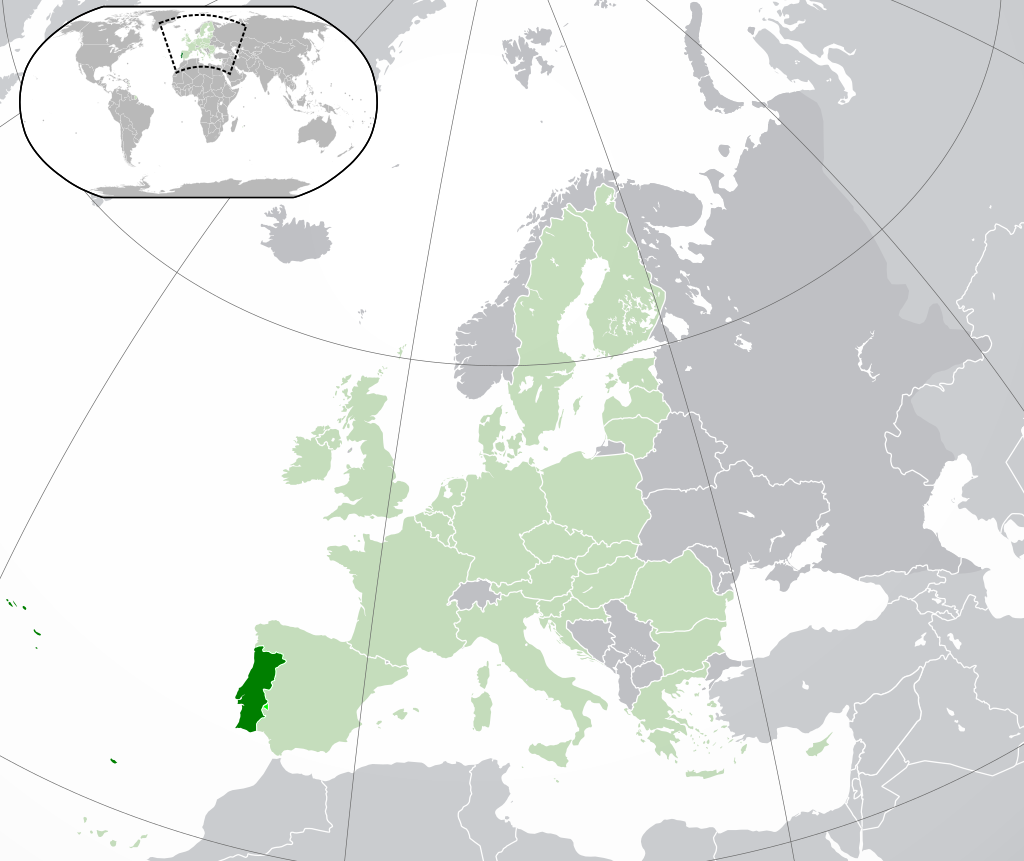

In [2]:
Image("portugal.png")

We will learn how to conduct this type of predictive modeling later. In this project, though, we'll be performing exploratory analyses on the data to better understand it. Remember, exploring data visually is often the first step data scientists take when working with new data.

Take a look at the data frame. We can display the first ten rows of the data in the console, or we can view the entire data frame as a tab in RStudio's top left pane using `View(data_frame)`.

Here are descriptions of the variables in the data set and the range of values for each taken from the paper:

* **X**: X-axis spatial coordinate within the Montesinho park map: 1 to 9
* **Y**: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* **month**: Month of the year: 'jan' to 'dec'
* **day**: Day of the week: 'mon' to 'sun'
* **FFMC**: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
* **DMC**: Duff Moisture Code index from the FWI system: 1.1 to 291.3
* **DC**: Drought Code index from the FWI system: 7.9 to 860.6
* **ISI**: Initial Spread Index from the FWI system: 0.0 to 56.10
* **temp**: Temperature in Celsius degrees: 2.2 to 33.30
* **RH**: Relative humidity in percentage: 15.0 to 100
* **wind**: Wind speed in km/h: 0.40 to 9.40
* **rain**: Outside rain in mm/m2 : 0.0 to 6.4
* **area**: The burned area of the forest (in ha): 0.00 to 1090.84

The `X` and `Y` variables are [coordinates](https://en.wikipedia.org/wiki/Geographic_coordinate_system) of fire locations. While we have not yet worked with visualizing spatial data, we will learn to do so later. We will put this concept aside for now.

The acronym `FWI` stands for ["fire weather index"](https://en.wikipedia.org/wiki/Forest_fire_weather_index), a method used by scientists to quantify risk factors for forest fires. We can read more about the FWI system and the variables included in this data set [here](https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi).

When it comes to understanding forest fires and what can be done to manage them, it is helpful to have an idea of when the fires are most likely to occur.

Take a look at the data. Which variables can help us understand when forest fires tend to occur?

There are two variables that have to do with time:` month` and `day`. We can ask the questions:

* During which months are forest fires most common?
* On which days of the week are forest fires most common?

To answer these questions, create two bar charts:

* One showing the number of forest fires occuring during each month
* Another showing the number of forest fires occurring on each day of the week

Since we need to count the number of fire occurrences per month or per day, it makes sense to begin by splitting the data into groups (by month or day), applying the `n()` function to count the number of observations in each group, and saving the resulting summary as a data frame. 

Then, we can use that data frame to create our bar chart.

Remember that to use `group_by()` and `summarize()`, we will need the `dplyr` package. To create the bar graphs, we will need the `ggplot2` package. Recall that we need to have the packages installed (we only need to do this once) and loaded (we need to do this for each new RStudio session).

Let's have a look at the bar graphs with the reordered month and day variables:

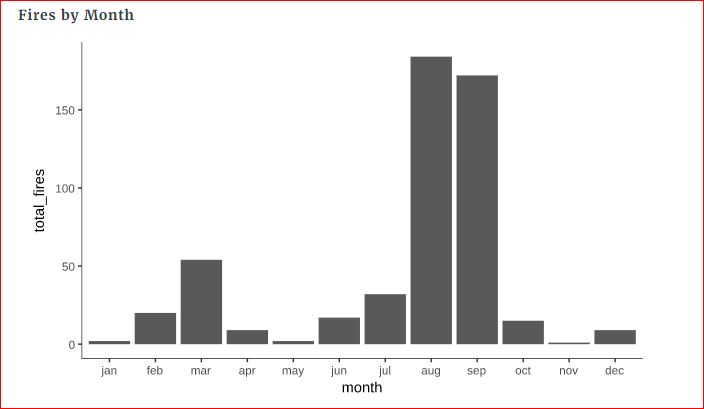

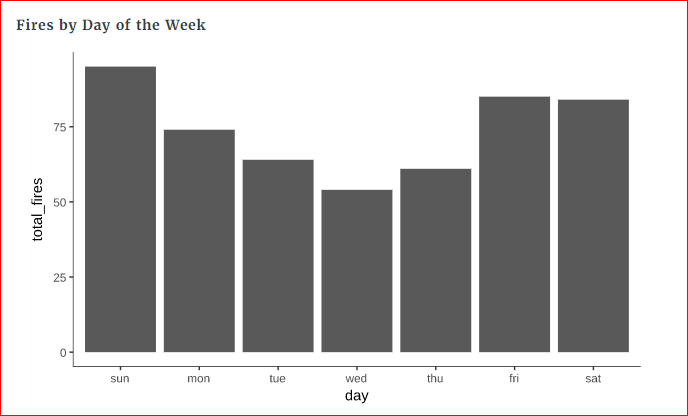

As we look at the graphs, what can we determine about when forest fires are more likely to occur?

It's clear that August and September, late summer months in the Northern hemisphere, see more forest fires than other months.

It also looks as though Friday, Saturday, and Sunday have more forest fires than days in the middle of the week. Why do we think this may be?

To explore causes of the temporal patterns of forest fire occurrence the bar charts reveal, we can look more closely at how the variables that relate to forest fires vary by month and by day of the week.

Create box plots to visualize the distribution of the following variables by month and by day of the week:

* FFMC
* DMC
* DC
* ISI
* temp
* RH
* wind
* rain

Recall that we can make producing multiple plots much more efficient by following these steps:

* Writing a function
* Creating vectors of variable names
* Applying the function to the variable vectors using functionals from the `purrr` package

We recommend writing two functions:

* One for visualizing distributions by month
* Another for visualizing distributions by day of the week

Then, create vectors containing names of the x and y variables and use the `map2()` functional to apply the functions to the vectors.

Our box plots may look something like ours. Let's talk about how we can interpret them.

Let's look first at the distributions of variables by day of the week:

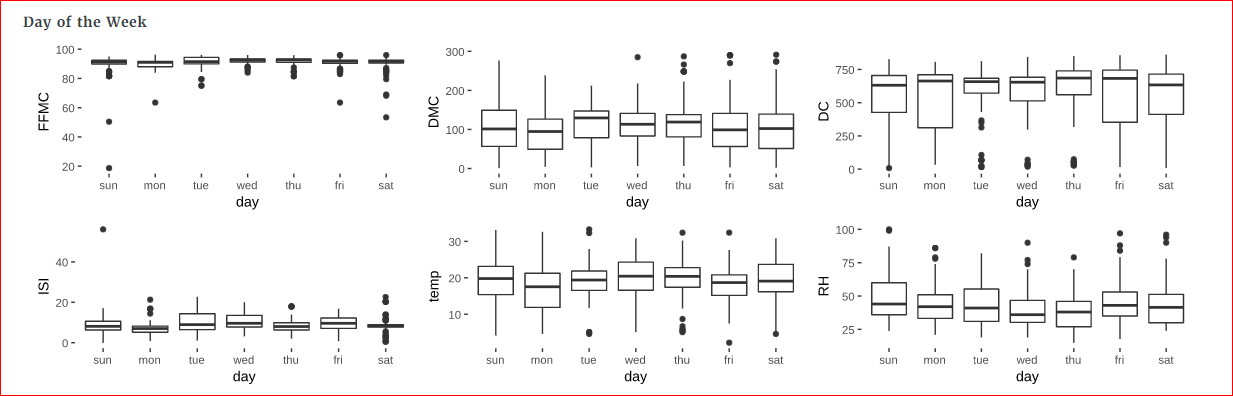

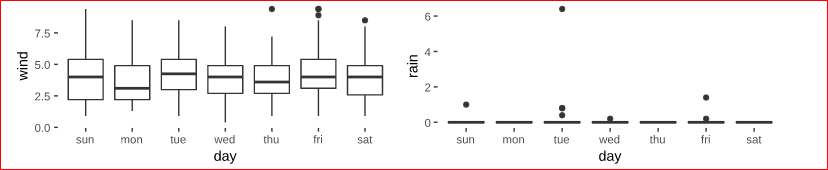

What observations can we make? First, it's clear from looking at the solid black lines in the centers of the box plots that medians for each variable seem to be quite consistent across days of the week. The size of the boxes are also consistent across days, suggesting that the ranges of data values are similar.

The number of outlier points and the length of the box whiskers representing high and low points vary from day to day. However, there do not seem to be any patterns that suggest that the variables differ by day of the week, despite the fact that the number of forest fires appears to be higher on weekends. Does this tell us anything about what some possible causes of that pattern may be?

It's interesting to look at plot of the the `rain` variable. A few very high values make it so the y-axis range is large enough to make the rest of the data appear to be close to zero. We could deal with this by changing the y-axis range (adding a `ylim()` layer) if we wanted to see the distributions more clearly.

Let's look at the distributions of variables by month:

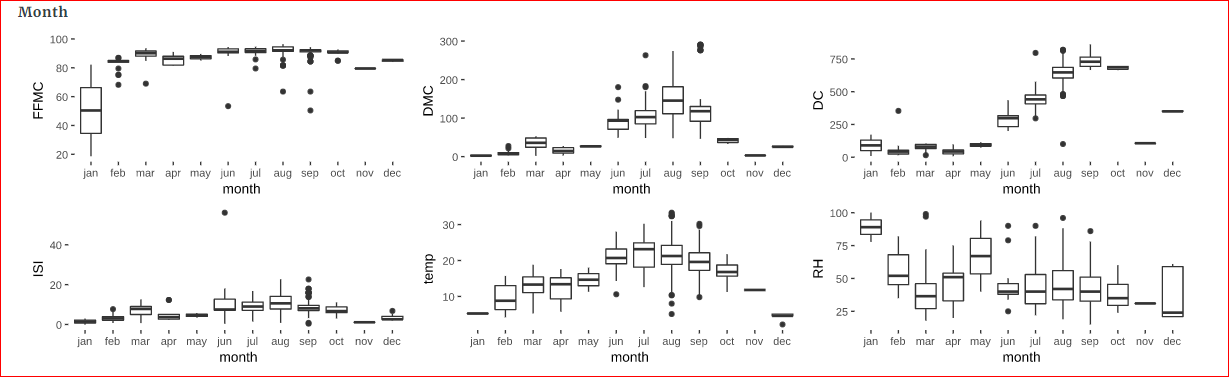

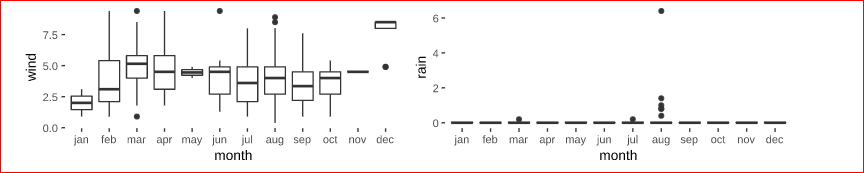

Unlike the variable distributions by days of the week, almost all the variables display clear differences among months.

We will talk about a few, and we encourage to visit the [FWI Information site](http://cwfis.cfs.nrcan.gc.ca/background/summary/fwi) and do some research to learn more about the other variables.

The `temp` variable shows a pattern of being higher during the summer months. We can also see that the `DC` variable, which stands for "drought code" and is a measure of how dry conditions are, is high during the late summer months. Do these variables' patterns make sense when we consider the months when fires are most common?

We've looked at patterns of variable distributions across months and days of the week. While variables don't seem to show interesting patterns when viewed by day of the week, there are interesting differences among months that look like they have the potential to explain why more forest fires occur in the late summer months.

Let's investigate further. Which variables are related to forest fire severity?

In this data set, the `area` variable contains data on the number of hectares of forest that burned during the forest fire. Perhaps we can use this variable as an indicator of the severity of the fire. The idea is that worse fires will result in a larger burned area.

Let's create scatter plots to see what can be learned about relationships between the area burned by a forest fire and the following variables:

* FFMC
* DMC
* DC
* ISI
* temp
* RH
* wind
* rain

In this case, we're interested in whether the variables above may affect forest fire area. For that reason, we should place `area` on the y-axes and the other variables on the x-axes of our scatter plots.

Remember that, to make multiple scatter plots, we can write a function and apply it to our variables of interest using a functional.

Let's interpret our scatter plots, which may look similar to these:

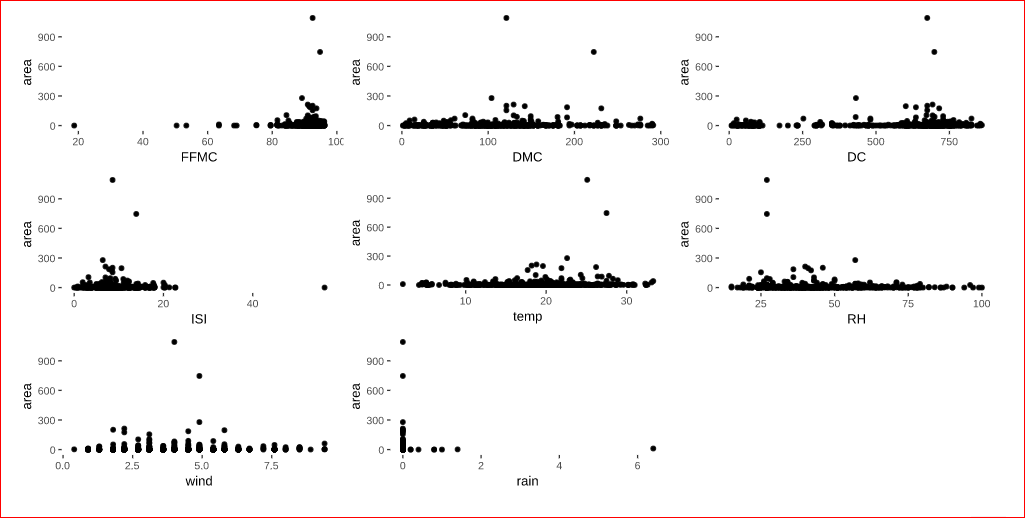

It's hard to understand relationships between variables when we look at these plots. There are a few points representing very large values of `area`, and many points representing values of area that are zero or close to zero. As a result, most points are clustered around the bottom of the plots.

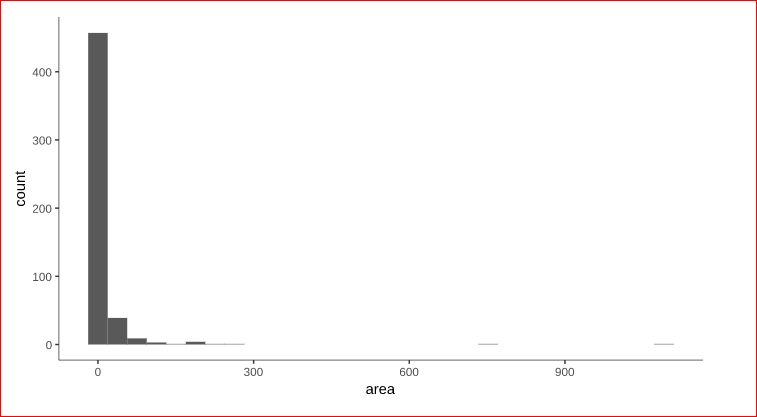

To more clearly visualize relationships between variables, we can experiment with filtering the data frame by values of area and plotting subsets:

* All data except for rows with very high values of area
* All data except for rows with zero values of area
* Data with values of area that fall within a specified range

Do we see any interesting relationships between forest fire area and the other variables we investigated?

If we do not see any interesting relationships, what might that tell us about our assumption that forest fire area is related to forest fire severity?

Curious to see what other members have done on this project? [Head over to our Community to check them out](https://community.dataquest.io/tags/c/social/share/49/277). 